In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



## Load the data

In [2]:
df = pd.read_csv('economic_index.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.2 KB


In [11]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
df.drop(['year','month'],axis=1, inplace=True)

## Explore the data 

In [13]:
df.corr()

,Unnamed: 0,interest_rate,unemployment_rate,index_price
Unnamed: 0,1.000000,-0.934555,0.935300,-0.988246
interest_rate,-0.934555,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-0.925814,1.000000,-0.922338
index_price,-0.988246,0.935793,-0.922338,1.000000


<Axes: >

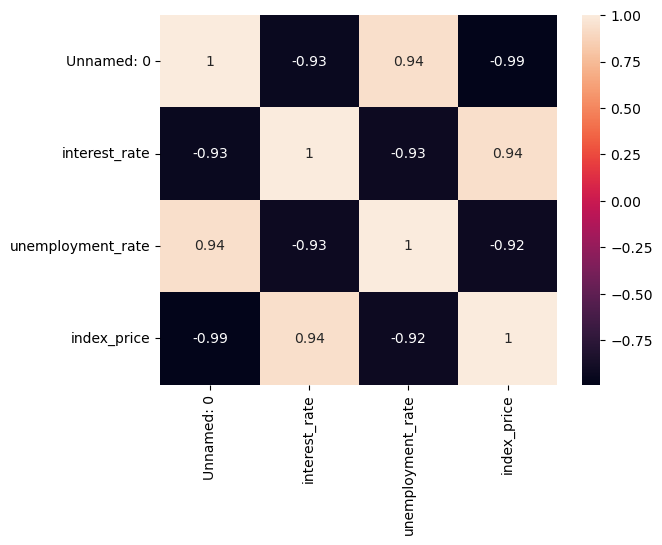

In [18]:
sns.heatmap(df.corr(), annot=True)   

## Independent and Dependent Variables


In [ ]:
X = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']

## Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardizing the data

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  

## Model training

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Model Evaluation

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')      
print(f'R2 Score: {r2}')

Mean Squared Error: 6957.10530325883
Mean Absolute Error: 71.71878409976625
R2 Score: 0.8254940547158576


## Model Accuracy
### Model is 82.54% Accurate